In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('/home/melissa/RESULTS/FINAL_MODEL/Rat/MNEConnectivity/')
coh = pd.read_csv('coh_connectivity_dataframe.csv')
pli = pd.read_csv('pli_connectivity_dataframe.csv')
wpli = pd.read_csv('wpli_connectivity_dataframe.csv')
plv = pd.read_csv('plv_connectivity_dataframe.csv')

In [ ]:
plv

In [3]:
#drop unnamed
wpli.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [4]:
wpli

,Animal_ID,Idx,Motor_wpli_delta,Visual_wpli_delta,Somatosensory_wpli_delta,Soma_Motor_wpli_delta,Vis_Soma_wpli_delta,Vis_Mot_wpli_delta,Motor_wpli_theta,Visual_wpli_theta,...,Somatosensory_wpli_beta,Soma_Motor_wpli_beta,Vis_Soma_wpli_beta,Vis_Mot_wpli_beta,Motor_wpli_gamma,Visual_wpli_gamma,Somatosensory_wpli_gamma,Soma_Motor_wpli_gamma,Vis_Soma_wpli_gamma,Vis_Mot_wpli_gamma
0,S7088,0,0.297968,0.339187,0.107067,0.073702,0.094021,0.133236,0.218066,0.290746,...,0.054171,0.038193,0.044965,0.069516,0.059823,0.059157,0.024847,0.013596,0.010702,0.025363
1,S7088,1,0.286461,0.384565,0.146093,0.058545,0.099206,0.099515,0.194735,0.332949,...,0.038475,0.026777,0.034961,0.042132,0.075578,0.091107,0.044866,0.020075,0.020708,0.033455
2,S7088,3,0.202465,0.190245,0.102581,0.063100,0.016605,0.079981,0.200604,0.088149,...,0.037321,0.025463,0.026704,0.041776,0.118101,0.073440,0.045525,0.016685,0.017860,0.032964
3,S7088,4,0.264331,0.271589,0.130421,0.079495,0.084361,0.112270,0.170096,0.146833,...,0.027442,0.025334,0.025045,0.030586,0.109805,0.128597,0.048701,0.027853,0.027767,0.039798
4,S7088,5,0.240272,0.254133,0.022605,0.062973,0.048661,0.103530,0.174522,0.217666,...,0.039938,0.022960,0.026948,0.032765,0.072925,0.052354,0.043338,0.020367,0.022897,0.029437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247242,S7086,34552,0.217389,0.234476,0.040511,0.063228,0.025789,0.082595,0.196985,0.251071,...,0.033586,0.019426,0.025436,0.040056,0.064128,0.105249,0.049192,0.016319,0.027648,0.039160
247243,S7086,34555,0.283188,0.189997,0.096828,0.084939,0.058099,0.103927,0.168593,0.246910,...,0.028187,0.030223,0.037925,0.055604,0.067841,0.128098,0.048769,0.020750,0.030995,0.043004
247244,S7086,34556,0.158038,0.226870,0.032756,0.044673,0.053458,0.097271,0.131242,0.281949,...,0.031366,0.027707,0.037768,0.045931,0.081396,0.090602,0.037305,0.015669,0.019062,0.032359
247245,S7086,34558,0.190566,0.244223,0.073208,0.058541,0.051189,0.085986,0.156989,0.243301,...,0.033354,0.023409,0.016291,0.038617,0.096116,0.135896,0.059765,0.022314,0.025126,0.048929


In [5]:
# List of columns to keep as identifier variables
id_vars = ["Animal_ID", "Idx"]

# List of columns to melt into 'frequency' values
value_vars = wpli.columns.difference(id_vars)

# Perform the melt operation to reshape the DataFrame
melted_df = pd.melt(wpli, id_vars=id_vars, value_vars=value_vars, var_name="regions_frequency")


In [6]:
melted_df

,Animal_ID,Idx,regions_frequency,value
0,S7088,0,Motor_wpli_beta,0.130447
1,S7088,1,Motor_wpli_beta,0.110499
2,S7088,3,Motor_wpli_beta,0.169724
3,S7088,4,Motor_wpli_beta,0.127662
4,S7088,5,Motor_wpli_beta,0.107132
...,...,...,...,...
7417405,S7086,34552,Visual_wpli_theta,0.251071
7417406,S7086,34555,Visual_wpli_theta,0.246910
7417407,S7086,34556,Visual_wpli_theta,0.281949
7417408,S7086,34558,Visual_wpli_theta,0.243301


In [7]:
np.unique(melted_df['regions_frequency'])

array(['Motor_wpli_beta', 'Motor_wpli_delta', 'Motor_wpli_gamma',
       'Motor_wpli_sigma', 'Motor_wpli_theta', 'Soma_Motor_wpli_beta',
       'Soma_Motor_wpli_delta', 'Soma_Motor_wpli_gamma',
       'Soma_Motor_wpli_sigma', 'Soma_Motor_wpli_theta',
       'Somatosensory_wpli_beta', 'Somatosensory_wpli_delta',
       'Somatosensory_wpli_gamma', 'Somatosensory_wpli_sigma',
       'Somatosensory_wpli_theta', 'Vis_Mot_wpli_beta',
       'Vis_Mot_wpli_delta', 'Vis_Mot_wpli_gamma', 'Vis_Mot_wpli_sigma',
       'Vis_Mot_wpli_theta', 'Vis_Soma_wpli_beta', 'Vis_Soma_wpli_delta',
       'Vis_Soma_wpli_gamma', 'Vis_Soma_wpli_sigma',
       'Vis_Soma_wpli_theta', 'Visual_wpli_beta', 'Visual_wpli_delta',
       'Visual_wpli_gamma', 'Visual_wpli_sigma', 'Visual_wpli_theta'],
      dtype=object)

In [9]:
melted_df

,Animal_ID,Idx,regions_frequency,value
0,S7088,0,Motor_wpli_beta,0.130447
1,S7088,1,Motor_wpli_beta,0.110499
2,S7088,3,Motor_wpli_beta,0.169724
3,S7088,4,Motor_wpli_beta,0.127662
4,S7088,5,Motor_wpli_beta,0.107132
...,...,...,...,...
7417405,S7086,34552,Visual_wpli_theta,0.251071
7417406,S7086,34555,Visual_wpli_theta,0.246910
7417407,S7086,34556,Visual_wpli_theta,0.281949
7417408,S7086,34558,Visual_wpli_theta,0.243301


In [13]:
# Split the 'regions_frequency' column into 'regions' and 'frequency' columns
melted_df[["regions", "frequency"]] = melted_df["regions_frequency"].str.split(("_wpli_" ), expand=True)

#Drop the original 'regions_frequency' column
melted_df.drop(columns=["regions_frequency"], inplace=True)

# Reorder the columns for better readability (you can customize the order if needed)
melted_df = melted_df[["Animal_ID", "Idx", "regions", "frequency", "value"]]
melted_df

,Animal_ID,Idx,regions,frequency,value
0,S7088,0,Motor,beta,0.130447
1,S7088,1,Motor,beta,0.110499
2,S7088,3,Motor,beta,0.169724
3,S7088,4,Motor,beta,0.127662
4,S7088,5,Motor,beta,0.107132
...,...,...,...,...,...
7417405,S7086,34552,Visual,theta,0.251071
7417406,S7086,34555,Visual,theta,0.246910
7417407,S7086,34556,Visual,theta,0.281949
7417408,S7086,34558,Visual,theta,0.243301


In [14]:
wildtypes_animal_ids = ['S7068', 'S7070', 'S7071', 'S7074', 'S7086', 'S7087', 'S7091', 'S7098', 'S7101']
gap_animal_ids = ['S7063', 'S7064', 'S7069', 'S7072', 'S7075', 'S7076', 'S7088', 'S7092', 'S7094', 'S7096']

In [15]:
# Add a 'Genotype' column based on the animal ID
melted_df['Genotype'] = melted_df['Animal_ID'].apply(lambda x: 'gap' if x in gap_animal_ids else ('wt' if x in wildtypes_animal_ids else None))

# Print the updated DataFrame
print(melted_df)

        Animal_ID    Idx regions frequency     value Genotype
0           S7088      0   Motor      beta  0.130447      gap
1           S7088      1   Motor      beta  0.110499      gap
2           S7088      3   Motor      beta  0.169724      gap
3           S7088      4   Motor      beta  0.127662      gap
4           S7088      5   Motor      beta  0.107132      gap
...           ...    ...     ...       ...       ...      ...
7417405     S7086  34552  Visual     theta  0.251071       wt
7417406     S7086  34555  Visual     theta  0.246910       wt
7417407     S7086  34556  Visual     theta  0.281949       wt
7417408     S7086  34558  Visual     theta  0.243301       wt
7417409     S7086  34559  Visual     theta  0.187652       wt

[7417410 rows x 6 columns]


In [16]:
# Group the DataFrame by 'Animal_ID' and 'frequency', and calculate the mean value within each group
averaged_df = melted_df.groupby(['Animal_ID', 'frequency', 'Genotype'], as_index=False)['value'].mean()

# Print the resulting DataFrame
print(averaged_df)

   Animal_ID frequency Genotype     value
0      S7063      beta      gap  0.055413
1      S7063     delta      gap  0.124844
2      S7063     gamma      gap  0.049360
3      S7063     sigma      gap  0.068063
4      S7063     theta      gap  0.087071
..       ...       ...      ...       ...
80     S7101      beta       wt  0.052601
81     S7101     delta       wt  0.118559
82     S7101     gamma       wt  0.046387
83     S7101     sigma       wt  0.063700
84     S7101     theta       wt  0.078215

[85 rows x 4 columns]


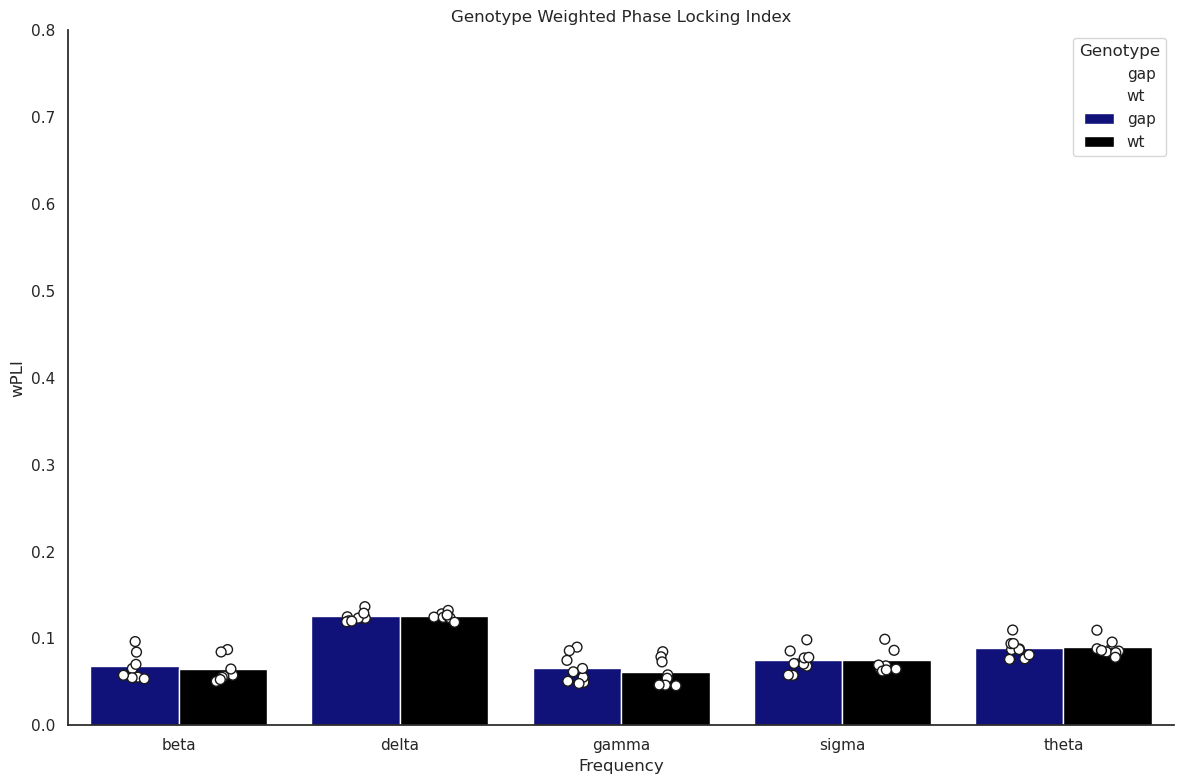

In [17]:
# Set the style
sns.set(style="white")
custom_palette = {"gap": "darkblue", "wt": "black"}
custom_palette_strip = {"gap": 'white', "wt": "white"}  # Tuple (fill color, outline color)

# Create the barplot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x="frequency", y="value", hue="Genotype", data=melted_df, palette=custom_palette)
sns.despine()

# Add labels and title
plt.xlabel("Frequency")
plt.ylabel("wPLI")
plt.title("Genotype Weighted Phase Locking Index")
plt.ylim(0, 0.8)

stripplot = sns.stripplot(x="frequency",y="value",hue="Genotype",data=averaged_df,jitter=True,dodge=True,
                         size=5, palette = custom_palette_strip,
                         edgecolor = 'k', sizes = (50, 50), linewidth = 1)

# Ensure stripplot is placed over the bars by adjusting the z-order
stripplot.set_zorder(10)  # Place stripplot in front of the barplot

# Show the plot
#plt.xticks(rotation=45)  
plt.tight_layout()  

os.chdir('/home/melissa/RESULTS/FINAL_MODEL/Rat/MNEConnectivity/plots/wpli')
plt.savefig("genotype_wpli.png", dpi=300, bbox_inches="tight")
plt.savefig("genotype_wpli.svg", dpi=300, bbox_inches="tight")
plt.show()

In [18]:
delta = melted_df.loc[melted_df['frequency'] == 'delta']
theta = melted_df.loc[melted_df['frequency'] == 'theta']
sigma = melted_df.loc[melted_df['frequency'] == 'sigma']
beta = melted_df.loc[melted_df['frequency'] == 'beta']
gamma = melted_df.loc[melted_df['frequency'] == 'gamma']

In [19]:
# Group the DataFrame by 'Animal_ID' and 'frequency', and calculate the mean value within each group
delta_averaged_df = delta.groupby(['Animal_ID', 'regions', 'frequency', 'Genotype'], as_index=False)['value'].mean()
theta_averaged_df = theta.groupby(['Animal_ID', 'regions', 'frequency', 'Genotype'], as_index=False)['value'].mean()
sigma_averaged_df = sigma.groupby(['Animal_ID', 'regions', 'frequency', 'Genotype'], as_index=False)['value'].mean()
beta_averaged_df = beta.groupby(['Animal_ID', 'regions', 'frequency', 'Genotype'], as_index=False)['value'].mean()
gamma_averaged_df = gamma.groupby(['Animal_ID', 'regions', 'frequency', 'Genotype'], as_index=False)['value'].mean()


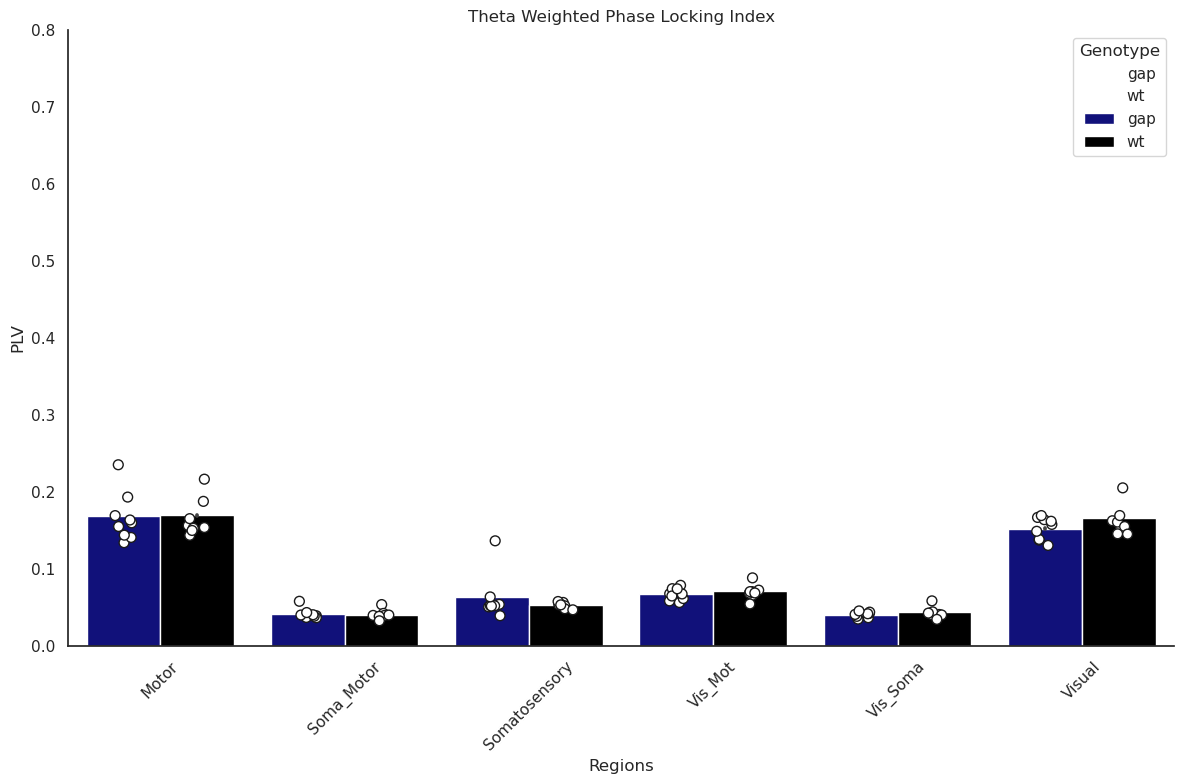

In [23]:
# Set the style

sns.set(style="white")

genotype_palette = {"gap": "darkblue", "wt": "black"}

# Create the barplot
plt.figure(figsize=(12, 8))  
sns.barplot(x="regions", y="value", hue="Genotype", data= theta, palette = genotype_palette)
#sns.stripplot(x="Frequency", y="Value", hue="Genotype", data=df, jitter=True, dodge=True, alpha=0.7, size=5)
sns.despine()


stripplot = sns.stripplot(x="regions",y="value",hue="Genotype",data= theta_averaged_df,jitter=True,dodge=True,
                         size=5, palette = custom_palette_strip,
                         edgecolor = 'k', sizes = (50, 50), linewidth = 1)

# Ensure stripplot is placed over the bars by adjusting the z-order
stripplot.set_zorder(10)  # Place stripplot in front of the barplot


# Add labels and title
plt.xlabel("Regions")
plt.ylabel("PLV")
plt.title("Theta Weighted Phase Locking Index")
plt.ylim(0, 0.8)

plt.xticks(rotation=45)  
plt.tight_layout()  # Ensure labels are not cut off

os.chdir('/home/melissa/RESULTS/FINAL_MODEL/Rat/MNEConnectivity/plots/wpli/')
plt.savefig("theta_wpli.png", dpi=300, bbox_inches="tight")
plt.savefig("theta_wpli.svg", dpi=300, bbox_inches="tight")
plt.show()